<a href="https://colab.research.google.com/github/Sujal3141/Customer-Segmentation-Analysis-/blob/master/Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#importing the required packages and modules

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import metrics
import sklearn
import matplotlib






In [6]:
# checking version of libraries for importing  the exact same version  in the web application.
print("numpy",np.__version__)
print("pandas",pd.__version__)
print("seaborn",sns.__version__)
print("matplotlib",matplotlib.__version__)
print("sktlearn",sklearn.__version__)


numpy 1.26.4
pandas 2.1.4
seaborn 0.13.1
matplotlib 3.7.1
sktlearn 1.3.2


In [7]:
# importing google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [8]:
# reading the csv dataset from the drive
mall_customer=pd.read_csv("/content/drive/MyDrive/BACKUP/Customer Segmentation Dataset/Mall_Customers.csv")


In [9]:
mall_customer

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
# customerid does not play any role in the dataset so dropping this column
mall_customer_new=mall_customer.drop(["CustomerID"],axis=1,inplace = False)

In [11]:
# dataset obtained after dropping the customerid column
mall_customer_new

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [12]:
# checking if their are any null values in the dataset
mall_customer_new.isnull().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [13]:
# converting the categorical column i.e Gender into numerical (0,1)
mall_customer_encoded = pd.get_dummies(mall_customer_new, columns=['Gender'])

In [14]:
#dataset obtained after encoding the gender column
mall_customer_encoded

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,False,True
1,21,15,81,False,True
2,20,16,6,True,False
3,23,16,77,True,False
4,31,17,40,True,False
...,...,...,...,...,...
195,35,120,79,True,False
196,45,126,28,True,False
197,32,126,74,False,True
198,32,137,18,False,True


In [15]:
# normailizing the data as when data is normalized the PCA seems to perform better.
scaler = StandardScaler()
x_scaled = scaler.fit_transform(mall_customer_encoded)



In [16]:
# after normalization a numpy array is obtained.
x_scaled

array([[-1.42456879, -1.73899919, -0.43480148, -1.12815215,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407, -1.12815215,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783,  0.88640526, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992,  0.88640526, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627,  0.88640526, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436,  0.88640526, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767, -1.12815215,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002,  0.88640526, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 , -1.12815215,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216,  0.88640526, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894,  0.88640526, -0.88640526],
       [-1.06573534, -1.54815205,  1.0

In [17]:
# checking for mean and standard deviation of the normalized dataset , the mean should be close to 0 and standard deviation should be 1.
print(x_scaled.mean())
print(x_scaled.std())

-7.283063041541027e-17
1.0


In [18]:
# removing outliers in the dataset using z score , so the value greater than 3 is considered to be an outlier .

z_scores = np.abs(stats.zscore(x_scaled))
outliers = np.where(z_scores > 3)
x_scaled = x_scaled[(z_scores < 3).all(axis=1)]



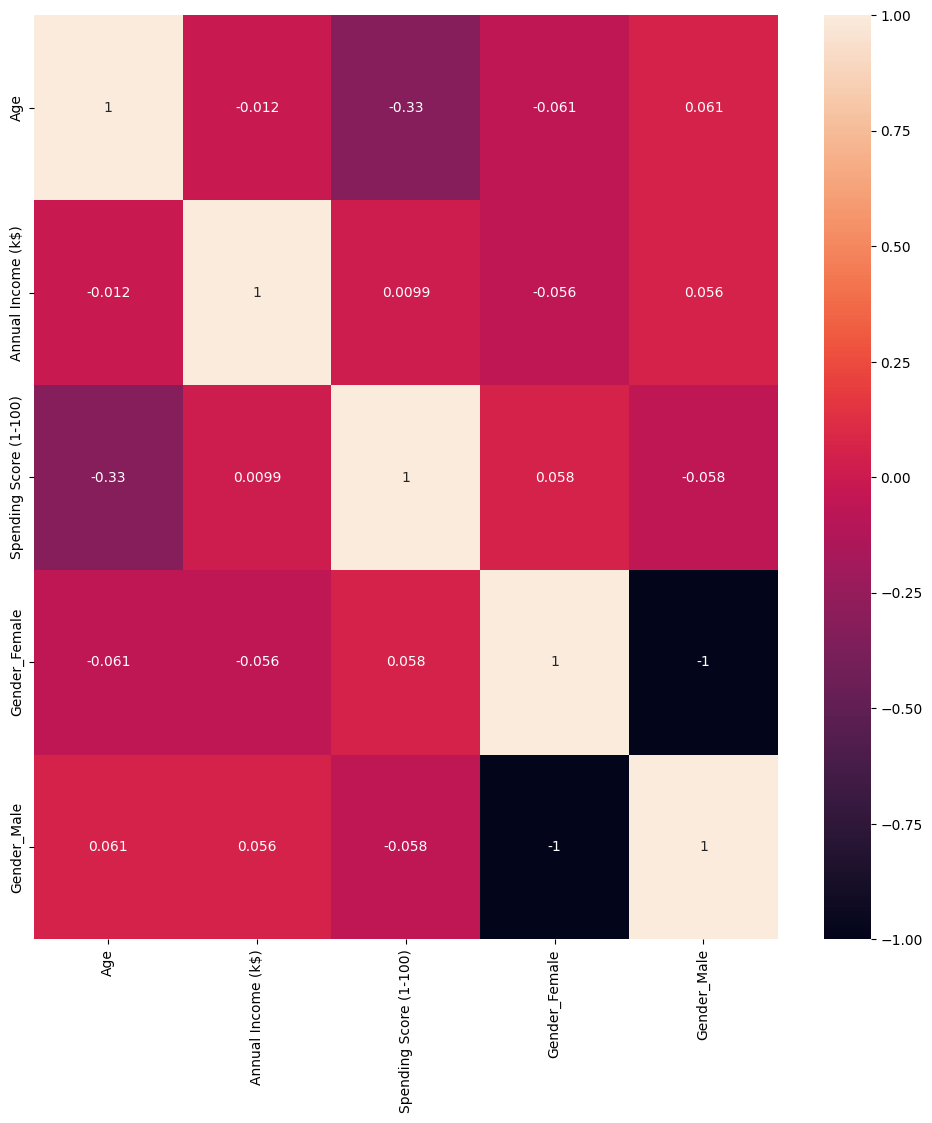

In [19]:
# plotting a heap map to show the correlation between the columns
plt.figure(figsize=(12,12))
sns.heatmap(mall_customer_encoded.corr(), annot=True)
plt.show()

In [20]:
# using pca to represent multidimensional data on a 2d plot
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
x_pca = pca.fit_transform(x_scaled)

In [21]:
# finding no of clusters using Elbow method
wcss=[]
for i in range(1,15):
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

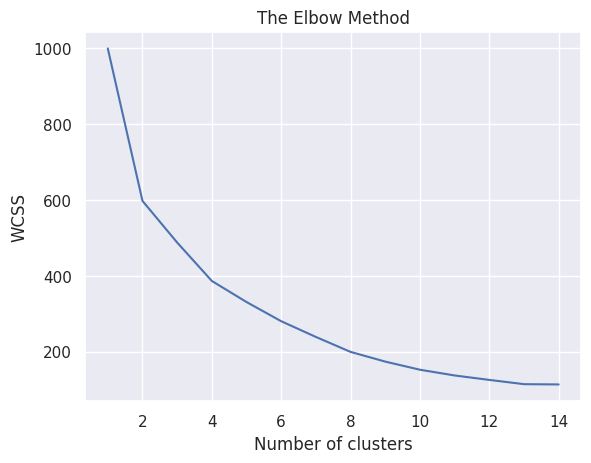

In [22]:
# plotting the graph of wcss vs no of cluster, point where the curve seems to be getting stablized is the optimal no of clusters.
sns.set()
plt.plot(range(1,15),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [23]:
# optimum clusters is 4 from the above plot.
#grouping our dataset into cluster using k-means clustering algorithm
kmeans=KMeans(n_clusters=4,init="k-means++",random_state=42)
y = kmeans.fit_predict(x_pca)
print(y)

[3 3 2 1 2 1 2 1 0 1 0 1 2 1 0 3 2 3 0 1 0 3 2 3 2 3 2 3 2 1 0 1 0 3 2 1 2
 1 2 1 2 3 0 1 2 1 2 1 1 1 2 3 1 0 2 0 2 0 1 0 0 3 2 2 0 3 2 2 3 1 0 2 2 2
 0 3 2 0 1 2 0 3 0 2 1 0 2 1 1 2 2 3 0 2 1 3 2 1 0 3 1 2 0 3 0 1 2 0 0 0 0
 1 2 3 1 1 2 2 2 2 3 2 1 3 1 1 0 3 0 3 0 3 1 1 0 1 2 3 0 1 2 3 1 1 0 3 0 1
 2 3 0 3 2 1 2 1 0 1 0 1 2 1 0 1 0 1 0 1 2 3 0 3 0 3 2 1 0 3 0 3 2 1 0 1 2
 3 2 3 2 1 2 1 0 1 2 1 2 3 0 3]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


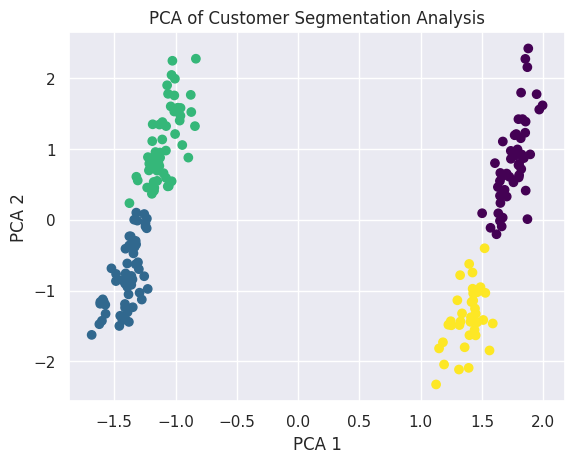

In [24]:
#Using pca to represent the cluster formed  on a 2d plot.

plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA of Customer Segmentation Analysis')
plt.show()




In [25]:
# Adding Clusting column in the original dataset
mall_customer_encoded['Cluster'] = y

In [26]:
# dataset obtained after concatinating the cluster column into the original dataset
mall_customer_encoded

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,Cluster
0,19,15,39,False,True,3
1,21,15,81,False,True,3
2,20,16,6,True,False,2
3,23,16,77,True,False,1
4,31,17,40,True,False,2
...,...,...,...,...,...,...
195,35,120,79,True,False,1
196,45,126,28,True,False,2
197,32,126,74,False,True,3
198,32,137,18,False,True,0


               Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female  \
Cluster                                                                         
0        49.437500           62.416667               29.208333            0.0   
1        28.392857           60.428571               68.178571            1.0   
2        47.803571           58.071429               34.875000            1.0   
3        28.250000           62.000000               71.675000            0.0   

         Gender_Male  
Cluster               
0                1.0  
1                0.0  
2                0.0  
3                1.0  


<Axes: xlabel='Cluster', ylabel='count'>

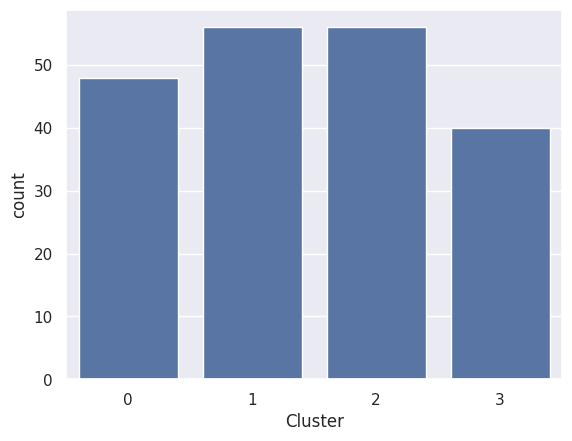

In [27]:
#Visualization

analysis = mall_customer_encoded.groupby('Cluster').mean()
print(analysis)

sns.countplot(x='Cluster', data=mall_customer_encoded)

# Building a model that can determine the cluster an unseen customer belongs to by using the obtained dataset

In [28]:
# exporting the obtained dataset as a csv file
mall_customer_encoded.to_csv('mall_customer_encoded.csv', index=False)

In [29]:
# importing the dataset
df = pd.read_csv('mall_customer_encoded.csv')

In [30]:
# splitting columns into train and test respectively.
X = df.drop('Cluster', axis=1)
Y = df['Cluster']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

In [31]:
x_train

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
4,31,17,40,True,False
32,53,33,4,False,True
142,28,76,40,True,False
145,28,77,97,False,True
109,66,63,48,False,True
...,...,...,...,...,...
106,66,63,50,True,False
14,37,20,13,False,True
92,48,60,49,False,True
179,35,93,90,False,True


In [32]:
# Using Decision Tree Classifier
model= DecisionTreeClassifier(criterion="entropy")
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [33]:
# Checking for Accuracy
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18  0  0  1]
 [ 0 27  2  0]
 [ 0  5 27  0]
 [ 0  0  0 20]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.84      0.93      0.89        29
           2       0.93      0.84      0.89        32
           3       0.95      1.00      0.98        20

    accuracy                           0.92       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.92      0.92      0.92       100



In [34]:
# exporting the model using pickle module
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)